# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### 1. Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

The Business task is to identify which factors make a car more or less expensive by designing a python application in jupyter notebook. This application will allow not only dealer tagging a price for a particular car that will be on the market, but also potential buyer to negociate a fair price for any particular car she/he/they is/are interested in.

In [1]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import HuberRegressor, LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn import set_config
set_config(display="diagram")

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
# hide warnings
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

from sklearn import set_config
set_config(display="diagram") #setting this will display your pipelines as seen above



### 2. Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

The dataset (vehicles.csv) given is in .csv format.It consists of 18 columns and 426880 rows as shown below (see Figure 2). The target columns is "price" which is numerical. there are only two more columns numerical: "odometer" and "year", i.e., the rest of the columns are categorical (ordinal and nominal). Consequently, most of the dataset provided will be imbalanced before entering the modeling phase. All the columns, but "region", "price", and "state" contain a bunch of "NaN" values. Duplicates were not observed. It is thought that in order to provide more insight into the aforementioned dataset, a data preparation, i.e, data cleaning process needs to be done first.

In [2]:
df = pd.read_csv('data/vehicles.csv')

In [3]:
df

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [5]:
df.describe()
# there are 4 

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [6]:
# show the null values in the dataset
df.isnull().sum()



id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

### 3. Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [7]:
df2 = df.copy()
# 3.1 Data cleanup
df2.drop(columns=['VIN', 'size', 'id'], inplace=True)
df2 = df.dropna()
df2.isnull().sum()


id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

In [8]:
df

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


#### 3.2 Categorical features cleaning

In [9]:
# all cataegorical columns
cat_large = []
cat_cols = df2.select_dtypes(include='object').columns
cat_cols.to_list()

['region',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'VIN',
 'drive',
 'size',
 'type',
 'paint_color',
 'state']

In [10]:
# count total number of unique values in each column
for col in cat_cols:
    print(f'{col}: {df2[col].nunique()}')
    

region: 392
manufacturer: 41
model: 5139
condition: 6
cylinders: 8
fuel: 5
title_status: 6
transmission: 3
VIN: 21938
drive: 3
size: 4
type: 13
paint_color: 12
state: 51


In [11]:
# remove categorical columns with more than 10 unique values for loop
for col in cat_cols:
    if df2[col].nunique() > 10:
        cat_cols = cat_cols.drop(col)
        cat_large.append(col)
print('Columns less that 10 unique values :',  cat_cols)
print('Columns with large category values :', cat_large)

Columns less that 10 unique values : Index(['condition', 'cylinders', 'fuel', 'title_status', 'transmission',
       'drive', 'size'],
      dtype='object')
Columns with large category values : ['region', 'manufacturer', 'model', 'VIN', 'type', 'paint_color', 'state']


#### 3.4 Numerical features cleaning by removing outliers

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'odometer'}>]], dtype=object)

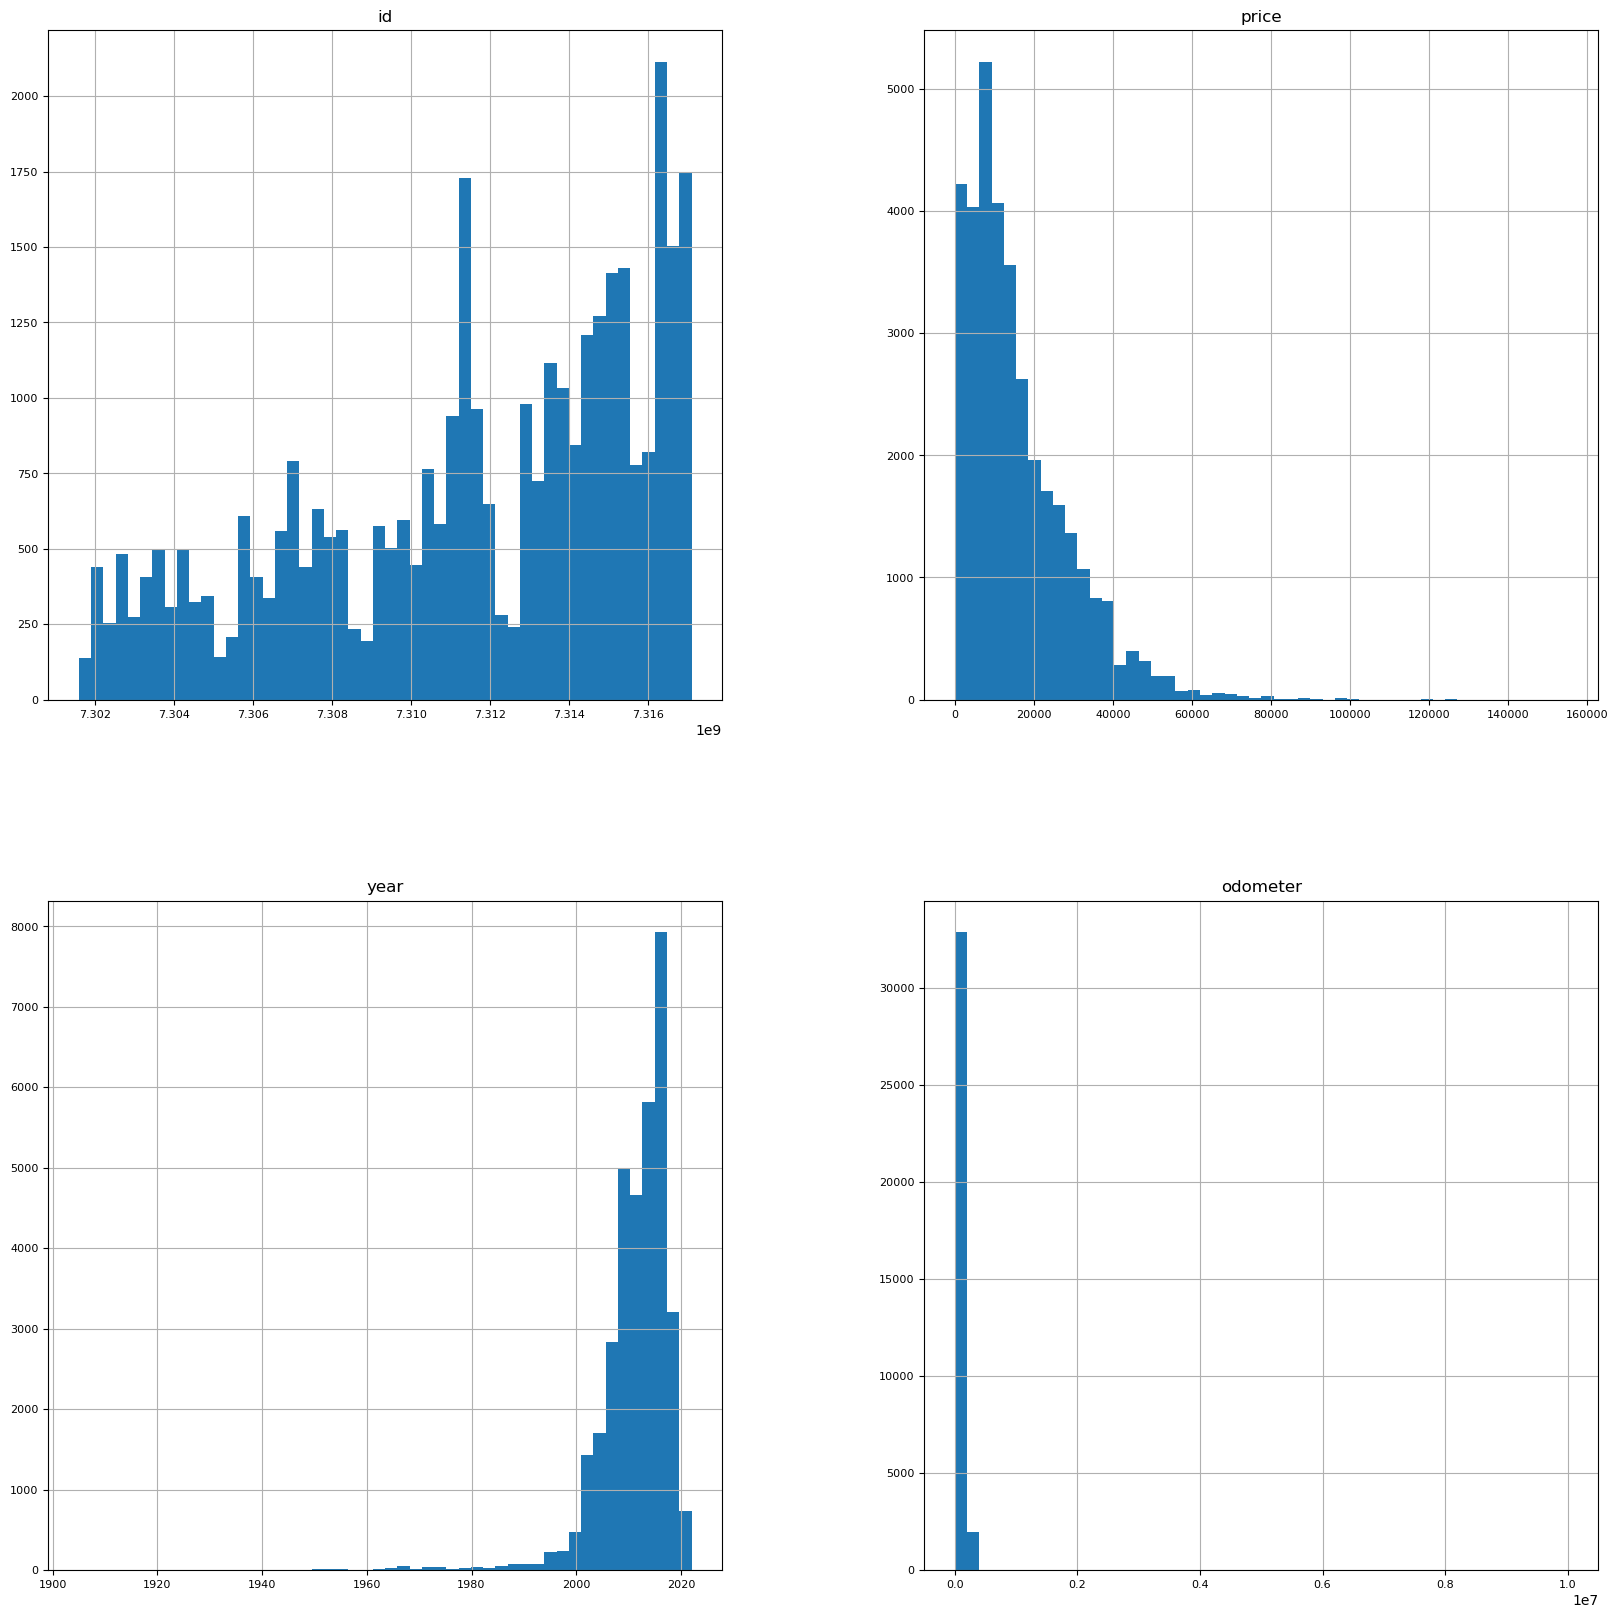

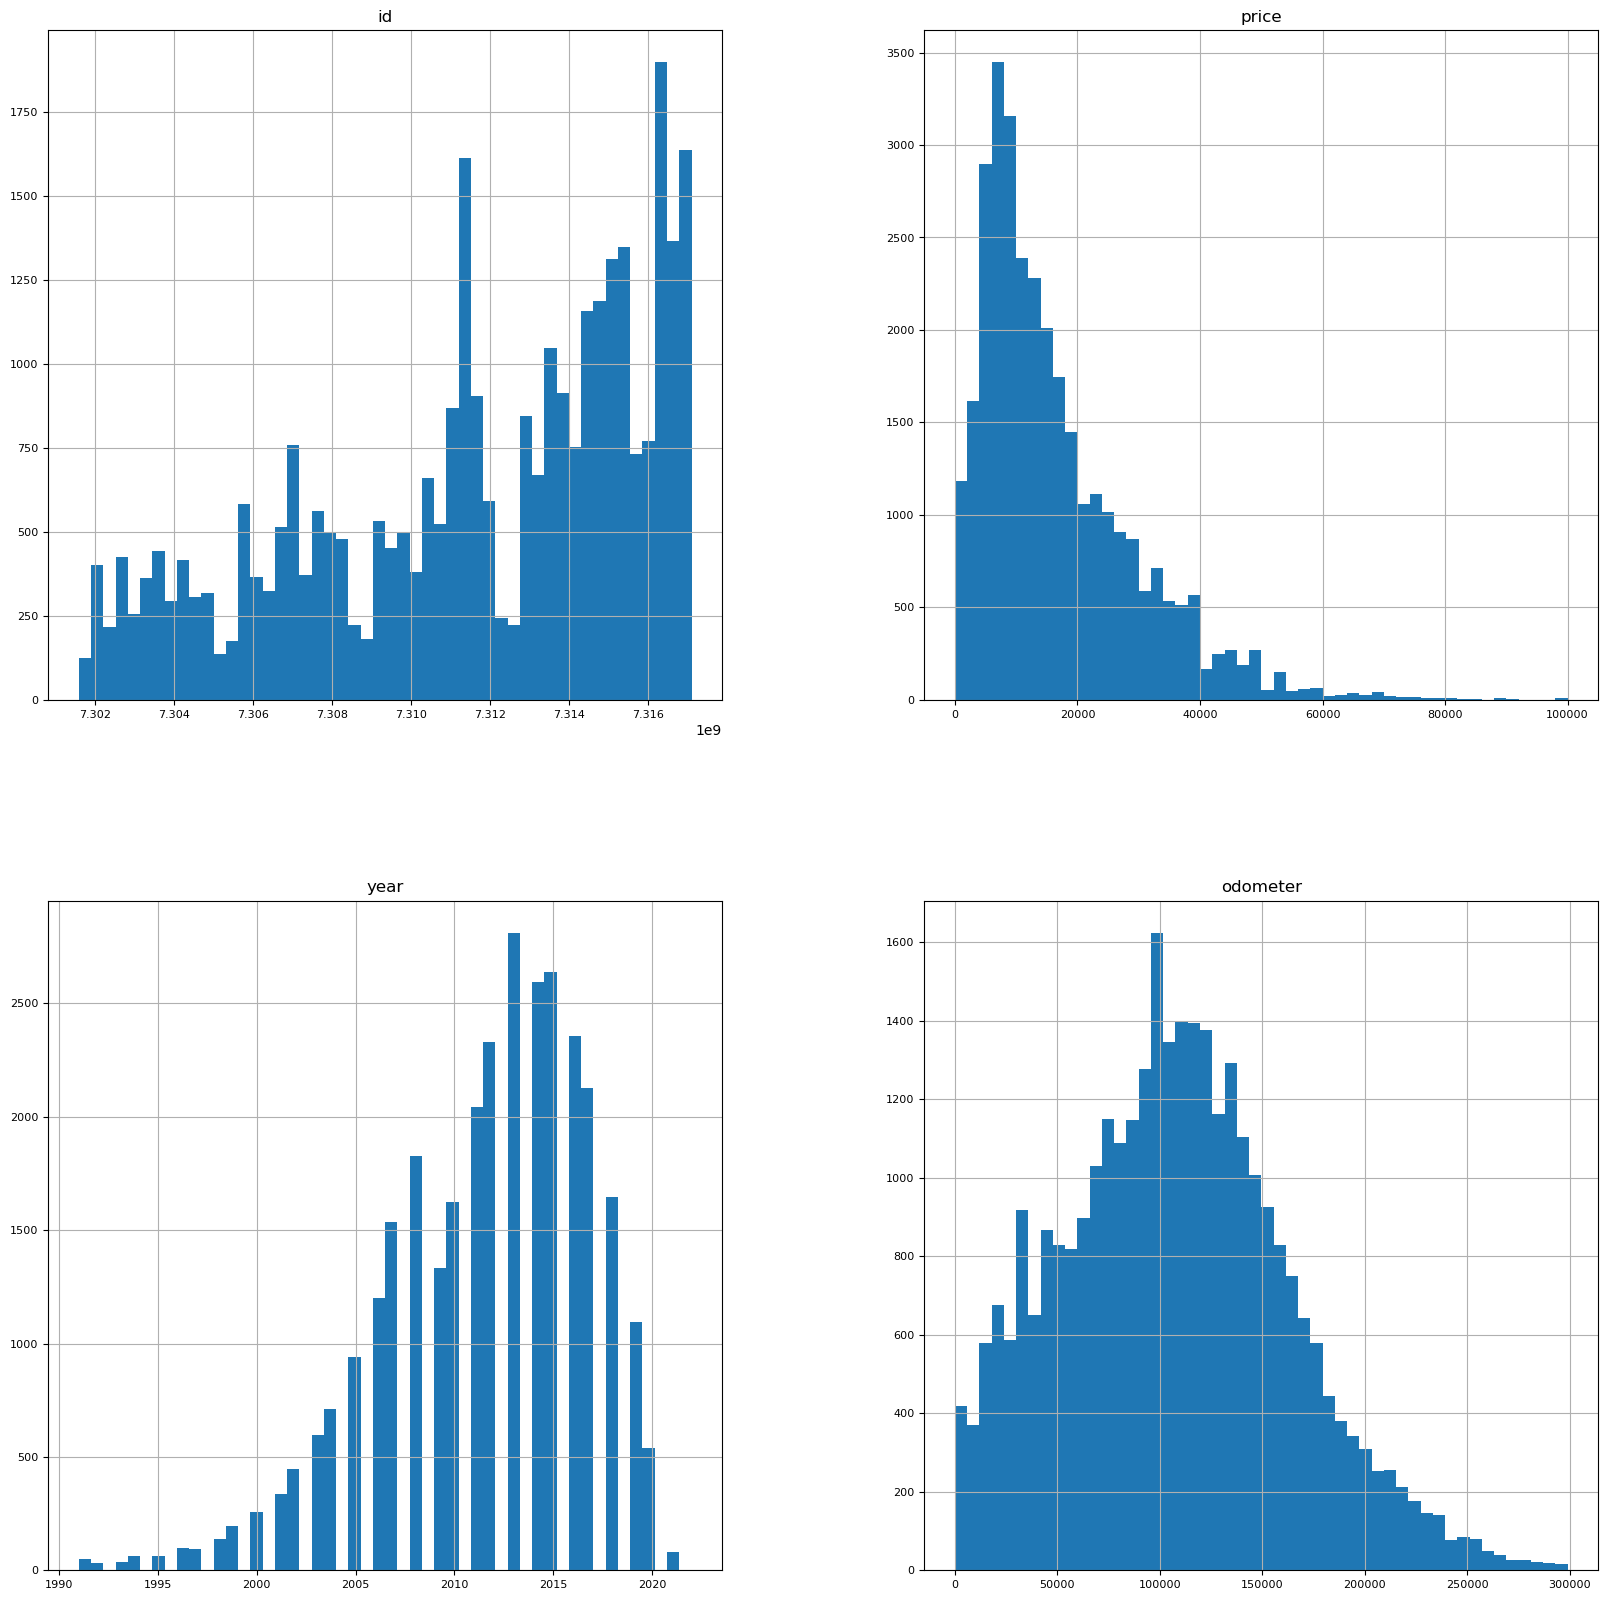

In [12]:
# remove outliers frm dataset
df2.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8)
df2 = df2[(df2['price'] < 100000) & (df2['year'] > 1990) & (df2['odometer'] < 300000)]
df2 = df2[(df2['price'] != 0)]
df2.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8)



#### above chart shows the distribution after removing the outliers looks better compared to earlier

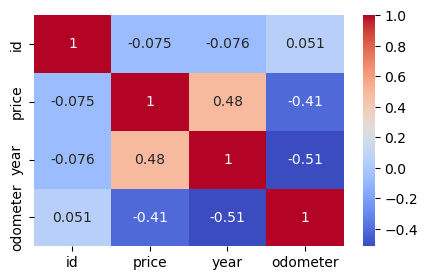

In [13]:
# show the correlation between all numerical columns
plt.figure(figsize=(5, 3))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm')
plt.show()


In [14]:
# Correlation of price variable in descending order of correlation valuess
df2.corr()['price'].sort_values(ascending=False)



price       1.000000
year        0.481271
id         -0.074805
odometer   -0.411519
Name: price, dtype: float64

Extracting new feature - 'age' from 'year' feature

In [15]:
# create column age based on current year
current_year = datetime.now().year
df2['age'] = current_year - df2['year']


year
age


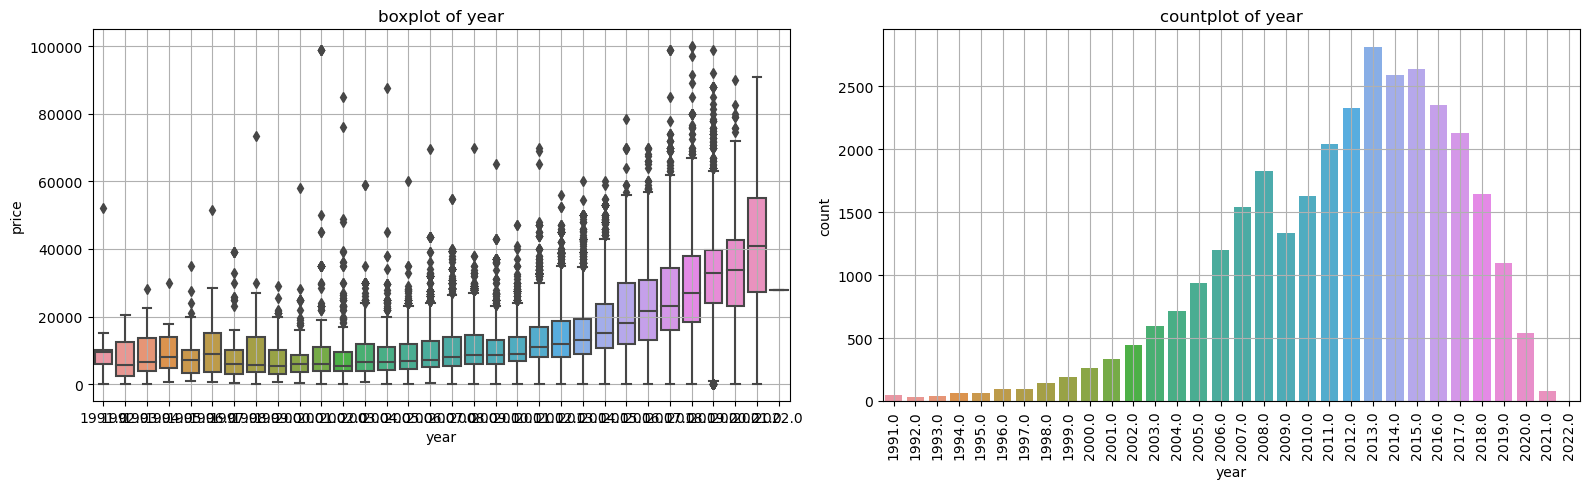

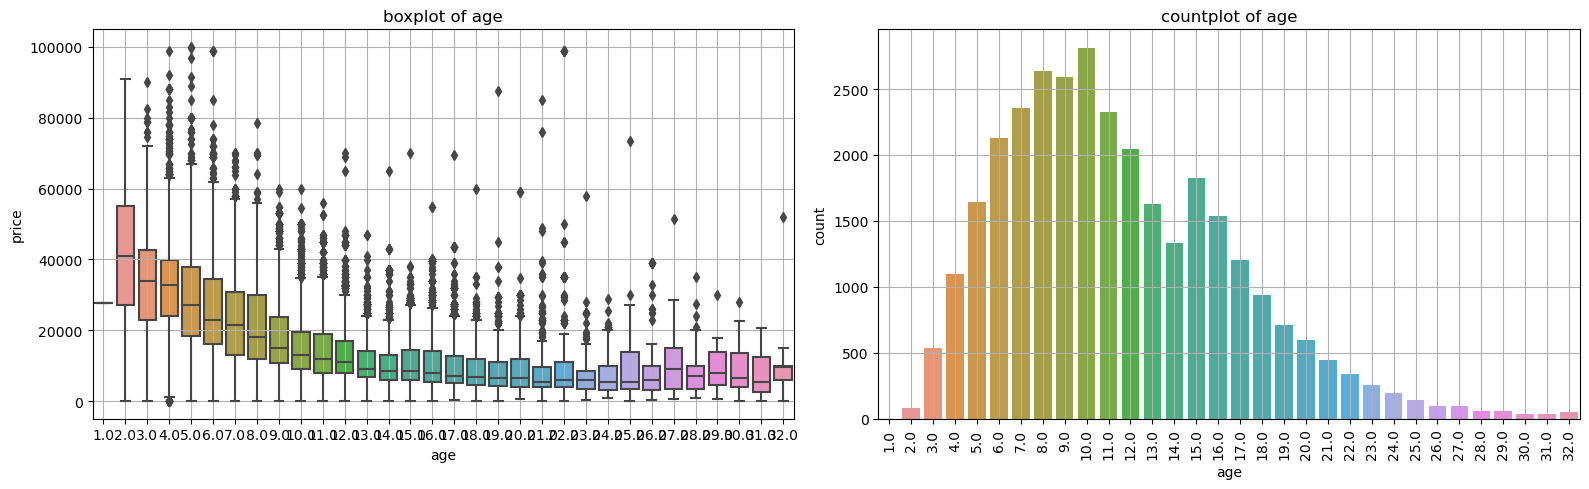

In [16]:
# extract numerical columns
num_cols_selected = ['year','age']
## show box plots wrt to price for each numerical columns
for variable in num_cols_selected:
    print(variable)
    fig, ax = plt.subplots(1, 2, figsize = (16, 5))
    sns.boxplot(x=variable, y='price', data=df2, ax=ax[0])
    plt.xticks(rotation=90)
    plt.tight_layout()
    ax[0].grid()
    title = f'boxplot of {variable}'
    ax[0].set_title(title)
    sns.countplot(x=variable, data=df2, ax=ax[1])
    plt.xticks(rotation=90)
    plt.tight_layout()
    ax[1].grid()
    title = f'countplot of {variable}'
    ax[1].set_title(title)

In [17]:
# from abover box plots we can conclude that
# 1. mean price of cars with year 2021 is highest and gradually decreases as year decreases
# 2. There are lot of cars with age 10 in the dataset, but mean price of cars with age 10 is not the highest. mean price of cars with age 1 is highest, followed by age 2 and 3

#### 3.5 Plotting the distribution of the 'price' variable 
#### 3.5.1 Smaller categorical columns

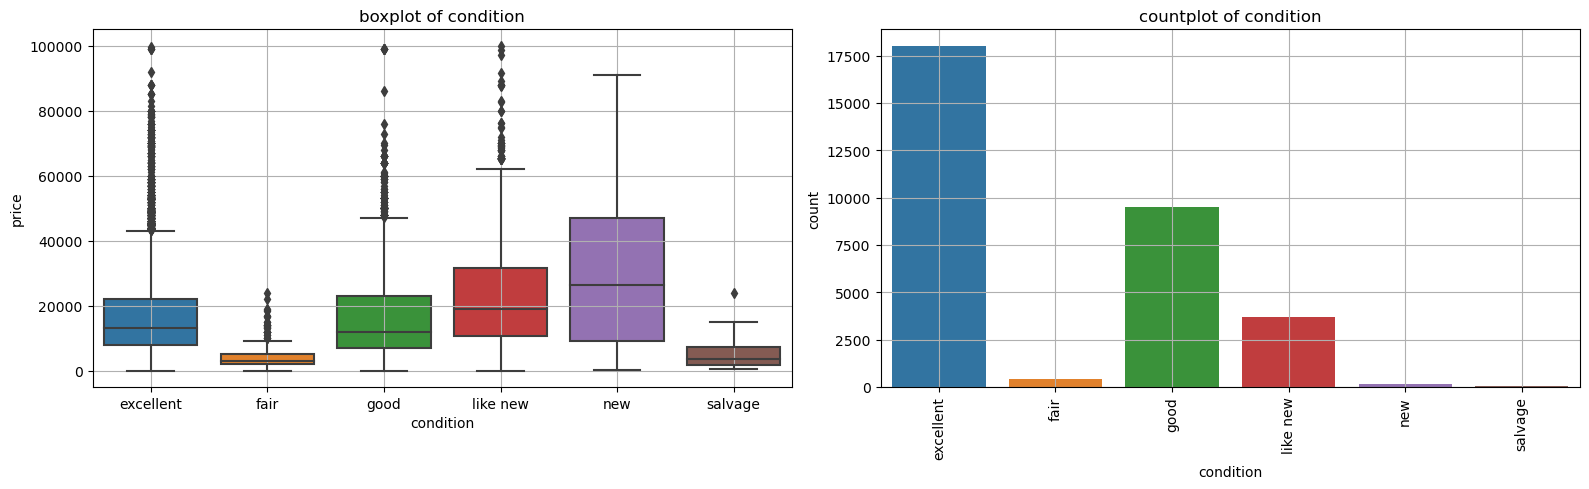

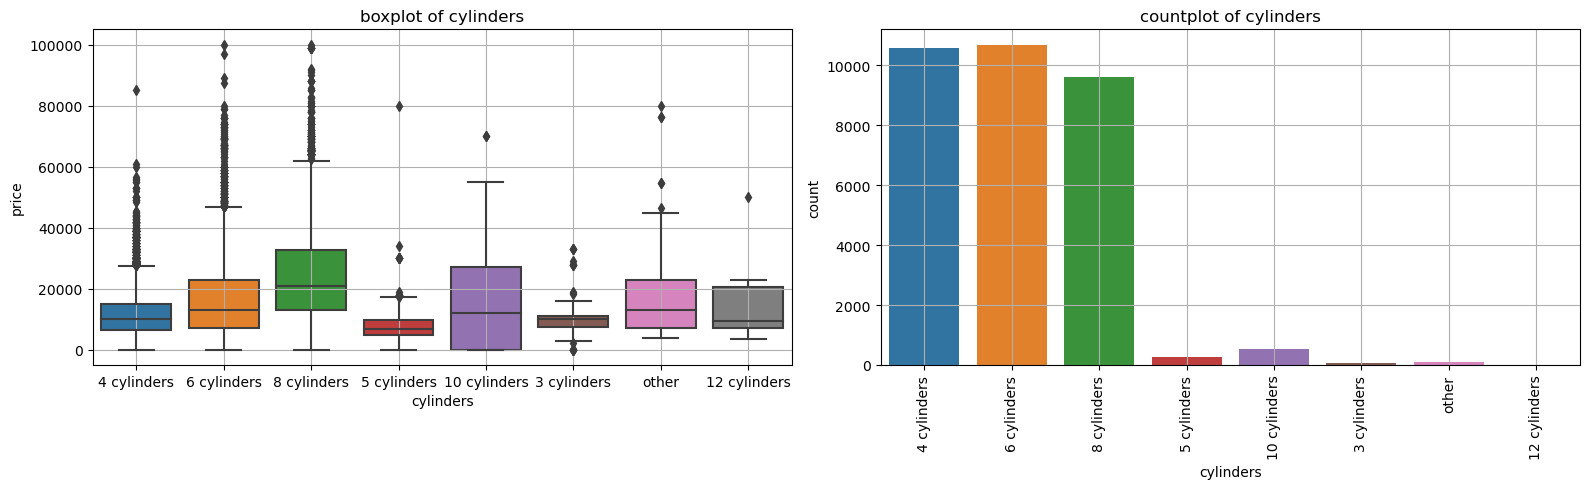

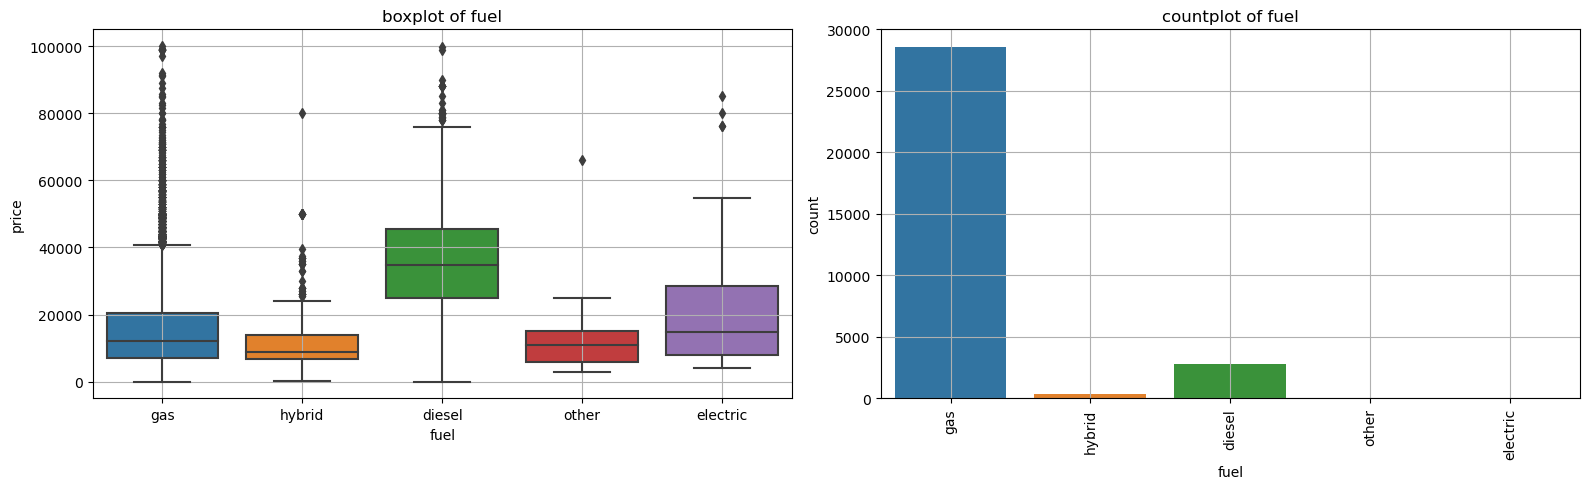

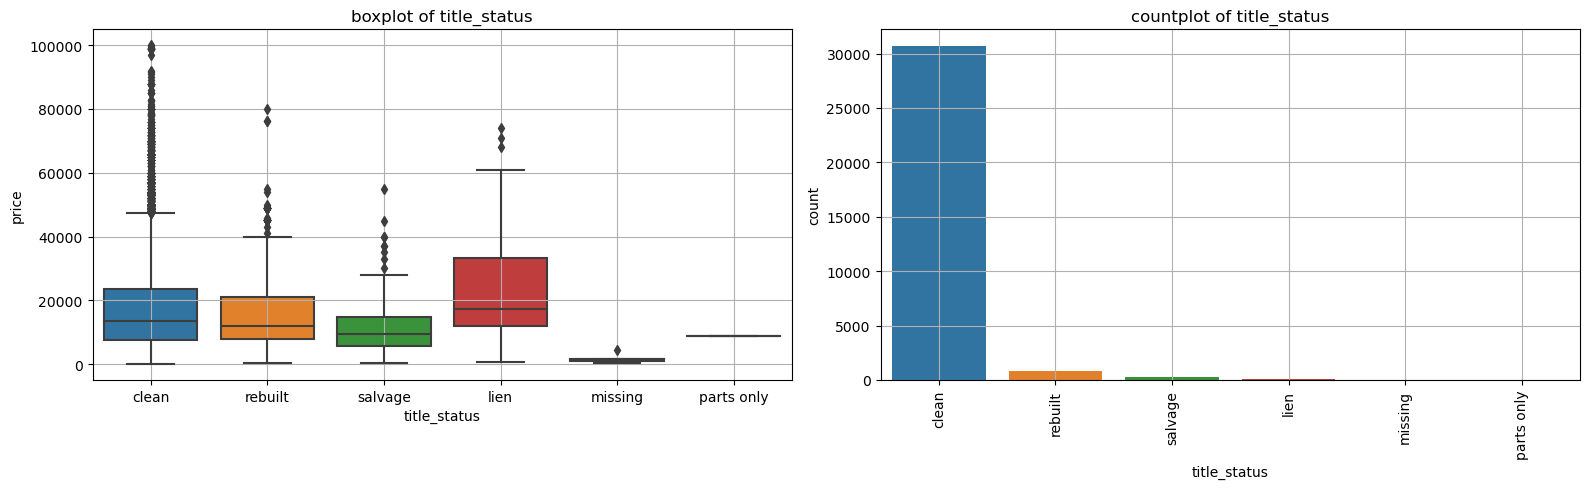

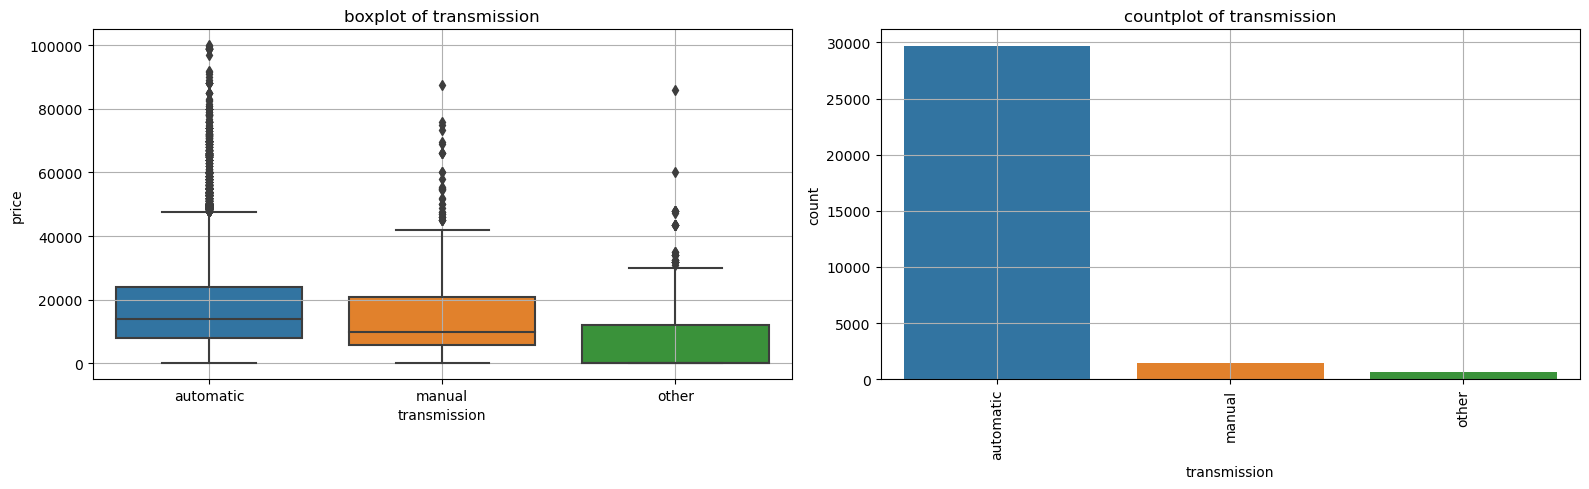

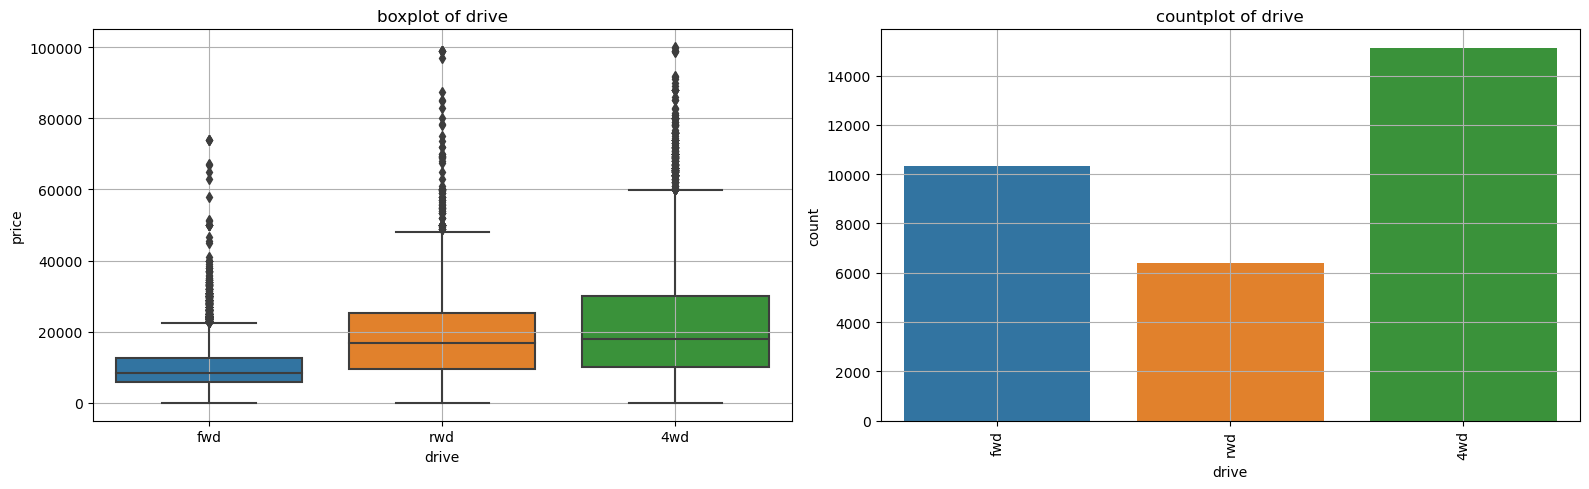

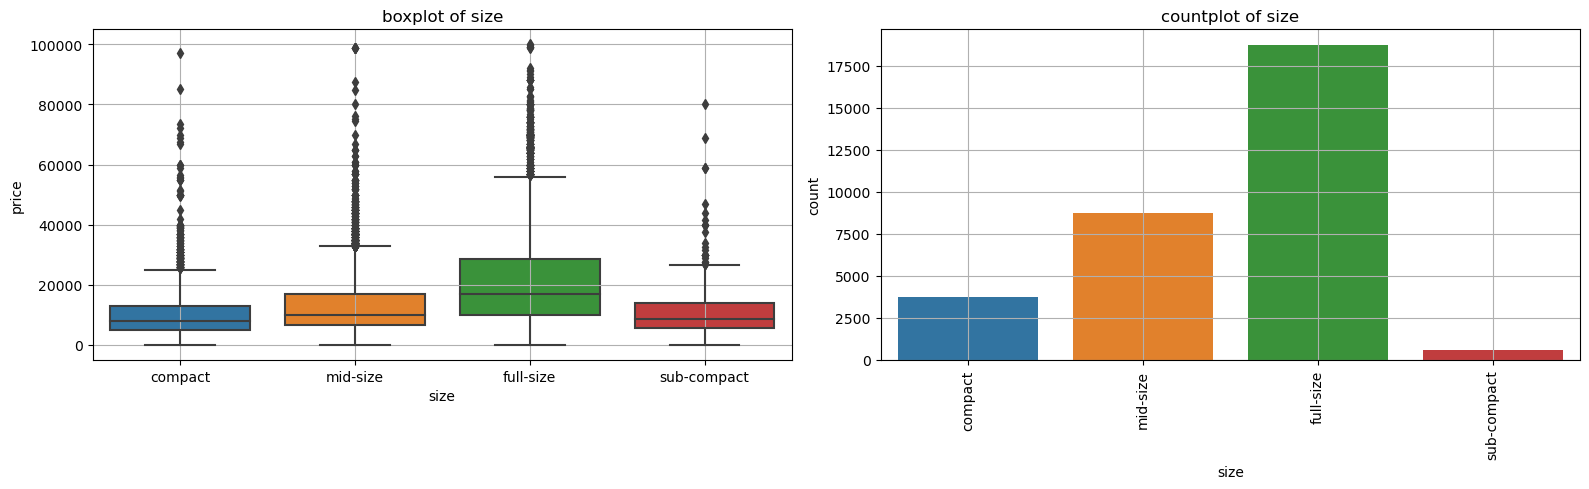

In [18]:
## show box plots wrt to price for each categorical column which had less than 10 unique values
for variable in cat_cols:
    fig, ax = plt.subplots(1, 2, figsize = (16, 5))
    sns.boxplot(x=variable, y='price', data=df2, ax=ax[0])
    plt.xticks(rotation=90)
    plt.tight_layout()
    ax[0].grid()
    title = f'boxplot of {variable}'
    ax[0].set_title(title)
    sns.countplot(x=variable, data=df2, ax=ax[1])
    plt.xticks(rotation=90)
    plt.tight_layout()
    ax[1].grid()
    title = f'countplot of {variable}'
    ax[1].set_title(title)

In [19]:
# some conclusions from the bar charts
# 1. cylinders has 8 unique values
# 2. drive has 3 unique values
# 3. fuel has 5 unique values
# 4. title_status has 6 unique values
# 5. transmission has 3 unique values
# 6. paint_color has 12 unique values

In [20]:
# from abover box plots we can conclude that
# 1. mean price of cars with condition 'new' is highest, followed by 'excellent' and 'good', 'fair' and 'salvage' are lowest
# 2. mean price of cars with cylinders 12 is highest, 5 is lowest
# 3. mean price of cars with drive '4wd' is highest, followed by 'rwd' and 'fwd'
# 4. mean price of cars with fuel 'other' is highest, 'hybrid' is lowest
# 5. mean price of cars with title_status 'lien' is highest, 'missing' is lowest
# 6. mean price of cars with transmission 'other' is highest, 'manual' is lowest

#### 3.5.2 Larger categorical columns

region
manufacturer
model
VIN
type
paint_color
state


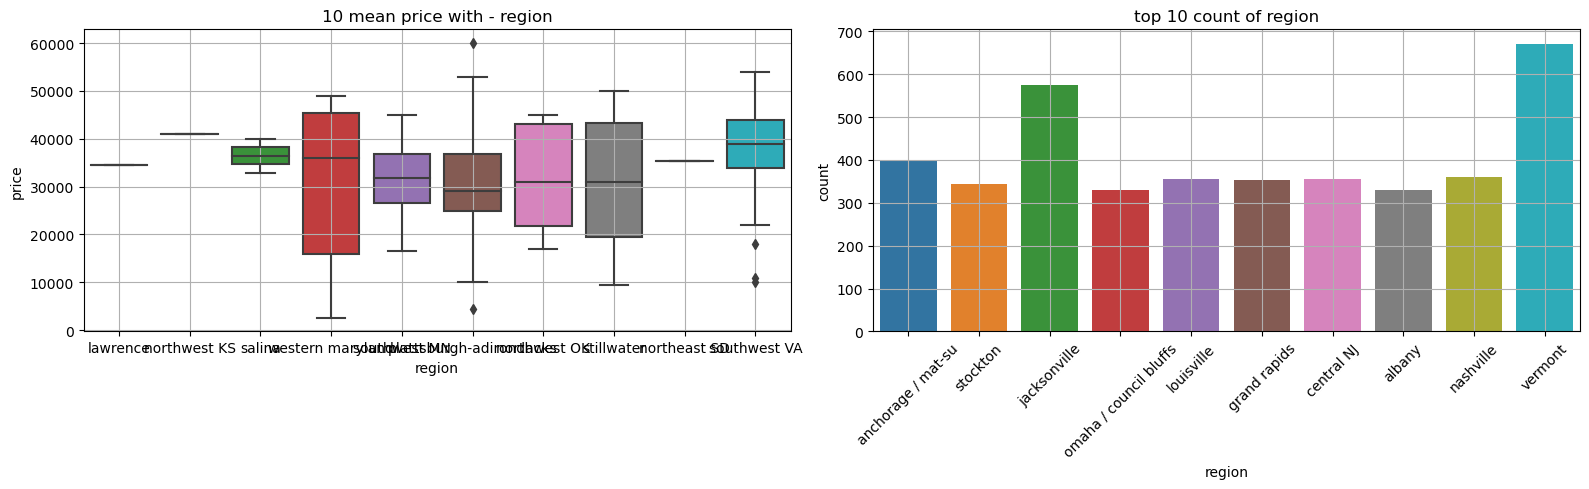

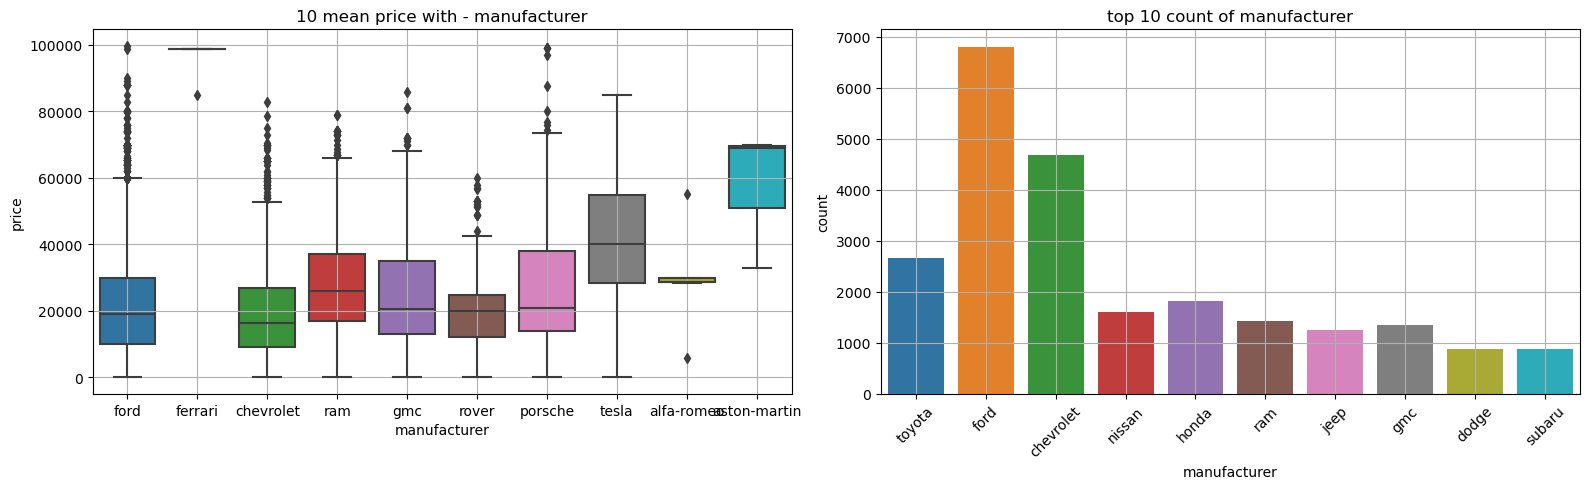

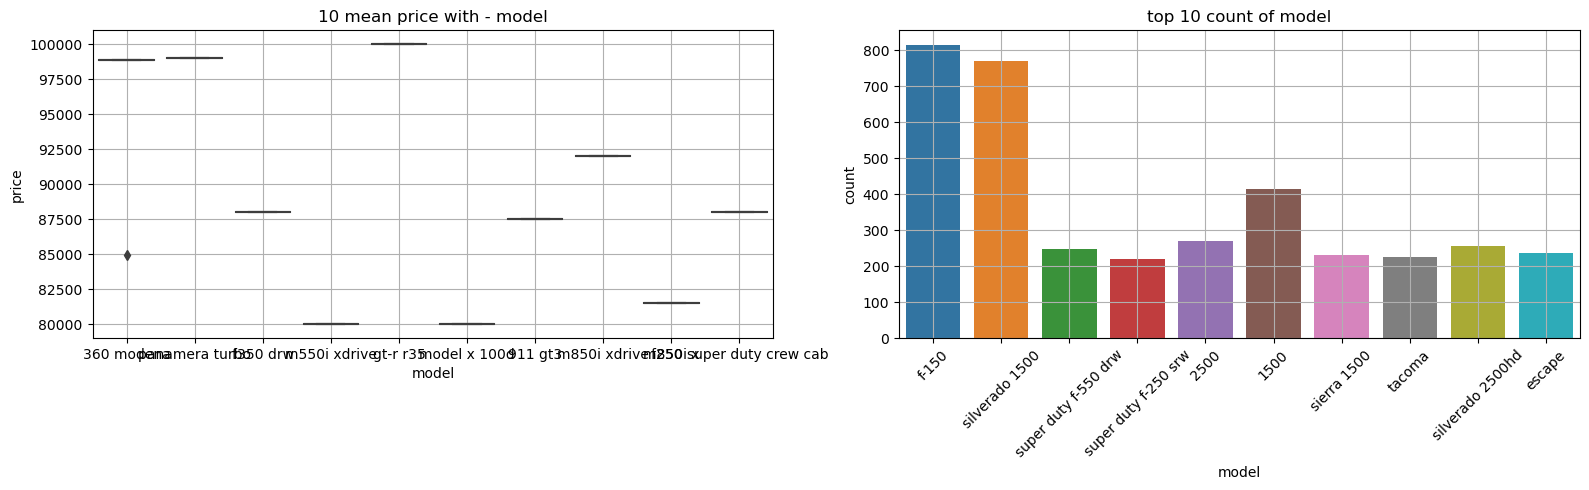

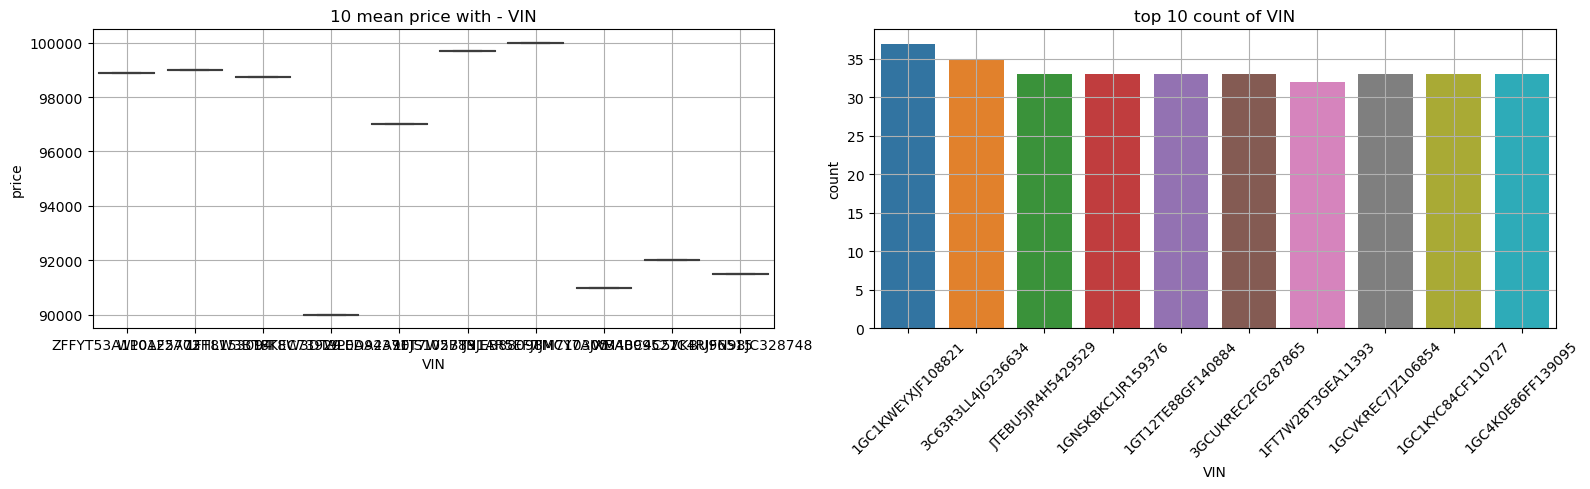

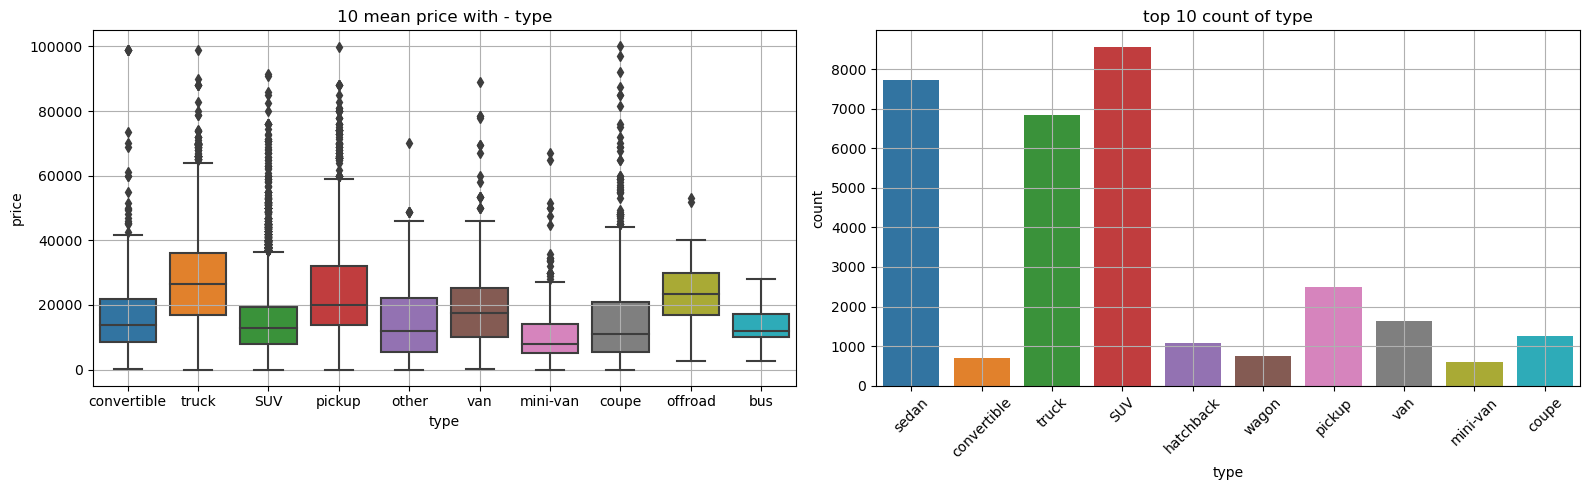

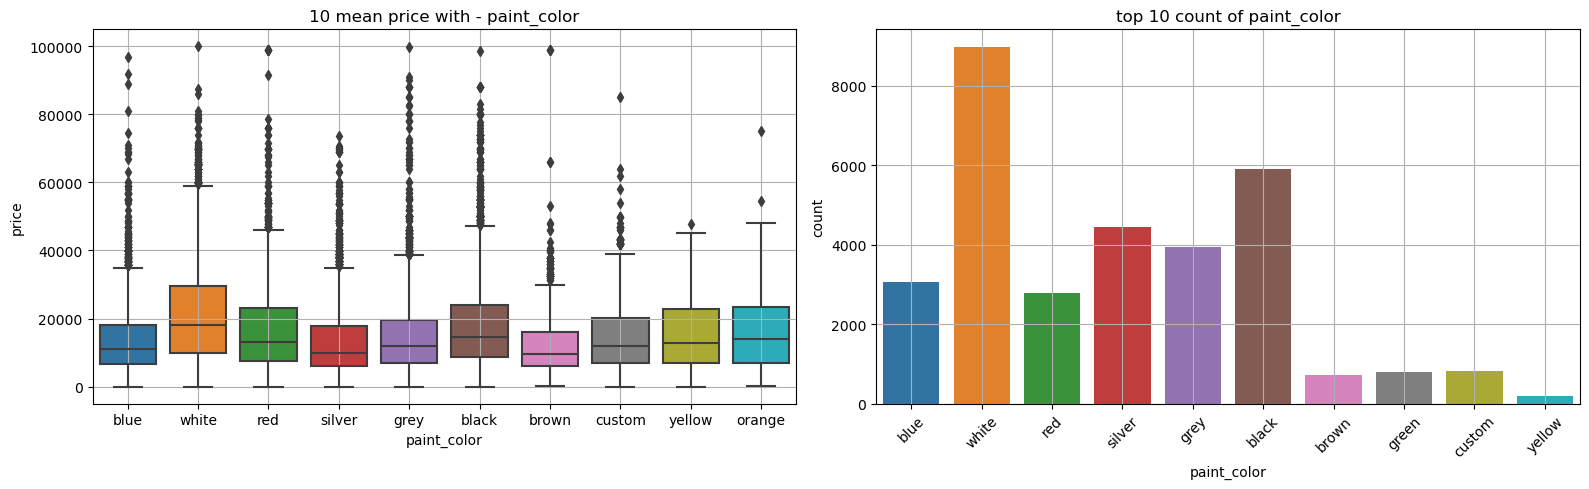

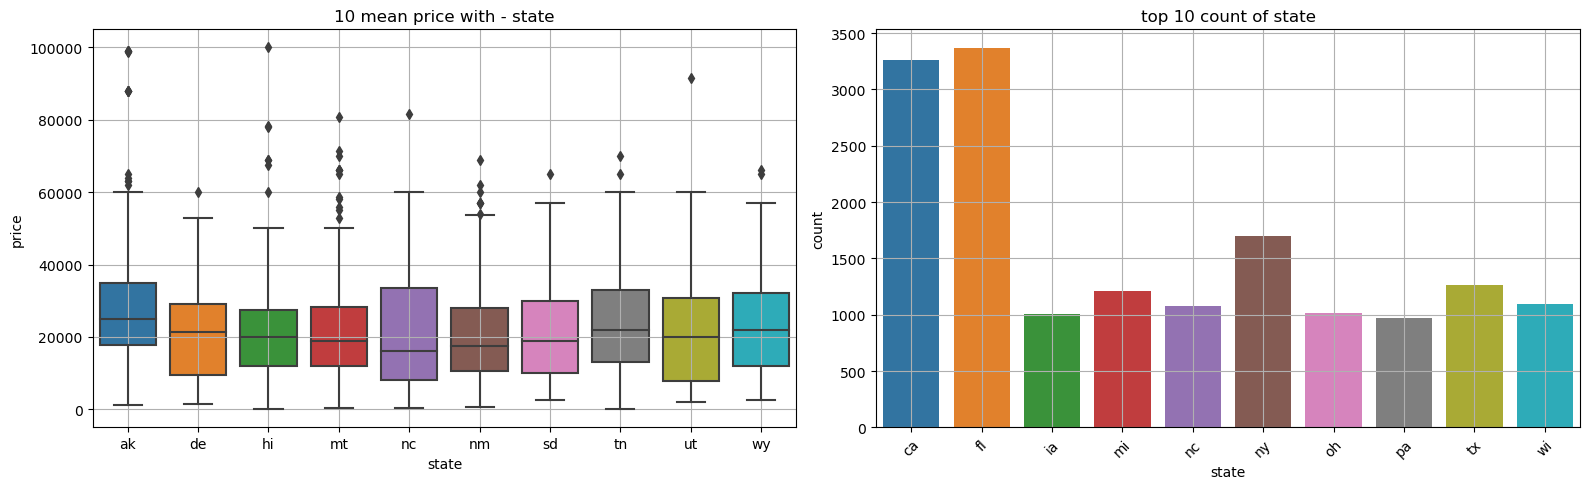

In [21]:
# Because it take more time to look at the categorical column which have more unique values,
# we will only look at the top 10 mean price and top 10 count of each categorical column
for variable in cat_large:
    print(variable)
    df3 = df2[[variable, 'price']]
    # keep only top 10 highest mean price
    df3 = df3[df3[variable].isin(df3.groupby(variable)['price'].mean().sort_values(ascending=False).head(10).index)]
    fig, ax = plt.subplots(1, 2, figsize = (16, 5))
    sns.boxplot(x=variable, y='price', data=df3, ax=ax[0])
    plt.xticks(rotation=45)
    plt.tight_layout()
    ax[0].grid()
    title = f'10 mean price with - {variable}'
    ax[0].set_title(title)
    df3 = df2[[variable, 'price']]
    df3 = df3[df3[variable].isin(df3[variable].value_counts().head(10).index)]
    sns.countplot(x=variable, data=df3, ax=ax[1])
    plt.xticks(rotation=45)
    plt.tight_layout()
    ax[1].grid()
    title = f'top 10 count of {variable}'
    ax[1].set_title(title)

In [22]:
# based on the boxplots and countplots we can conclude that
# 1. mean price of cars with manufacturer 'ferarri' is highest, 10th highest is 'jaguar'. coutplot shows that 'ford' is the most common manufacturer
# 2. coutplot shows that 'f-150' is the most common model
# 3. mean price of cars with type 'other' is highest, 10th highest is 'wagon'. coutplot shows that 'sedan' is the most common type
# 4. Hard to tell anything from the boxplots of paint_color, but from the countplots we can see that 'white' is the most common color
# 5. mean price of cars with state 'wv' is highest, 10th highest is 'sc'. coutplot shows that 'ca' is the most common state
# 6. coutplot shows that 'vermont' is the most common region




In [23]:
df2

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,age
215,7316482063,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al,21.0
219,7316429417,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al,28.0
268,7315946365,birmingham,9000,2008.0,mazda,miata mx-5,excellent,4 cylinders,gas,56700.0,clean,automatic,JM1NC25F570128735,rwd,compact,convertible,white,al,15.0
337,7315354216,birmingham,8950,2011.0,ford,f-150,excellent,6 cylinders,gas,164000.0,clean,automatic,1FTMF1CM6BKD55331,fwd,full-size,truck,white,al,12.0
346,7315259946,birmingham,98900,2001.0,ferrari,360 modena,good,8 cylinders,gas,20187.0,clean,automatic,ZFFYT53A110125703,rwd,mid-size,convertible,red,al,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426785,7303314912,wyoming,23495,2015.0,ford,f150 xlt 4x4,like new,8 cylinders,gas,146795.0,clean,automatic,1FTFX1EF5FFC24427,4wd,full-size,truck,black,wy,8.0
426788,7303227528,wyoming,12995,2016.0,chevrolet,cruze lt,like new,4 cylinders,gas,61127.0,clean,automatic,1G1BE5SM0G7266569,fwd,compact,sedan,silver,wy,7.0
426792,7303114896,wyoming,32999,2014.0,ford,"f350, xlt",excellent,8 cylinders,diesel,154642.0,clean,automatic,1FT8W3DT3EEB41548,4wd,full-size,pickup,brown,wy,9.0
426793,7303112347,wyoming,15999,2018.0,chevrolet,"cruze, lt",excellent,4 cylinders,gas,36465.0,clean,automatic,1G1BE5SM7J7133704,fwd,mid-size,sedan,black,wy,5.0


#### 3.7 Below are some util methods that are used to show graphs throughout modeling analysis.

In [53]:
dict = {'model': [],
        'train_mae': [],
        'test_mae': [],
        'train_mse': [],
        'test_mse': [],
        'train_rmse': [],
        'test_rmse': []}
out_df = pd.DataFrame(dict)


In [54]:
def plot_residuals(y_train, y_train_pred, y_test, y_test_pred, name):
    # plot residuals
    fig, ax = plt.subplots(1, 2, figsize=(16, 5))
    ax[0].scatter(y_train_pred, y_train_pred - y_train.values, c='blue', marker='o', label='Training data')
    ax[0].scatter(y_test_pred, y_test_pred - y_test.values, c='lightgreen', marker='s', label='Test data')
    ax[0].set_xlabel('Predicted values')
    ax[0].set_ylabel('Residuals')
    ax[0].legend(loc='upper left')
    ax[0].set_title(name + ' - Residuals')
    # plot predicted values
    ax[1].scatter(y_train_pred, y_train.values, c='blue', marker='o', label='Training data')
    ax[1].scatter(y_test_pred, y_test.values, c='lightgreen', marker='s', label='Test data')
    ax[1].set_xlabel('Predicted values')
    ax[1].set_ylabel('Real values')
    ax[1].legend(loc='upper left')
    ax[1].set_title(name + ': Training vs Test data')
    plt.tight_layout()
    plt.show()


In [55]:
def mse(X_train, X_test, y_train, y_test, model, name):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    train_mse = round(mean_squared_error(y_train, train_preds), 4)
    test_mse = round(mean_squared_error(y_test, test_preds), 4)
    print(name, f'Train MSE: {train_mse}')
    print(name, f'Test MSE: {test_mse}')
    # calculate mae
    train_mae = round(mean_absolute_error(y_train, train_preds), 4)
    test_mae = round(mean_absolute_error(y_test, test_preds), 4)
    plot_residuals(y_train, train_preds, y_test, test_preds, name)
    #insert into out_df
    out_df.loc[len(out_df)] = [name, train_mae, test_mae, train_mse, test_mse, np.sqrt(train_mse), np.sqrt(test_mse)]
    # dict.push({name, train_mse, test_mse})
    # X_train.columns[model['selector'].get_support()].tolist()



### 4. Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

#### 4.1 spliting the data into train and test

In [56]:

X = df2.drop(columns=['price'])
y = df2['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



In [57]:
# show value count for condition column
X_train['condition'].value_counts()

excellent    14386
good          7637
like new      2950
fair           339
new            135
salvage         28
Name: condition, dtype: int64

In [58]:
# ## 5. Preprocessing

# ### 5.1. Numeric Features
numeric_features = ['age', 'odometer']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# ### 5.2. Categorical Features
categorical_features = ['manufacturer', 'model', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color']
categorical_transformer = Pipeline(steps=[
    ('cat_encoder', OneHotEncoder(handle_unknown='ignore'))])

### 5.3. Ordinal Features
ordinal_features = ['condition']
ordinal_transformer = Pipeline(steps=[
    ('ord_encoder', OrdinalEncoder(categories = [['new', 'like new', 'excellent', 'good', 'fair', 'salvage']]))])


# ### 5.4. Column Transformer
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (categorical_transformer, categorical_features),
    (ordinal_transformer, ordinal_features))


In [59]:
X_train.count()

id              25475
region          25475
year            25475
manufacturer    25475
model           25475
condition       25475
cylinders       25475
fuel            25475
odometer        25475
title_status    25475
transmission    25475
VIN             25475
drive           25475
size            25475
type            25475
paint_color     25475
state           25475
age             25475
dtype: int64

I have used the following models:
1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. HuberRegressor
5. TransformedTargetRegressor


LinearRegression Train MSE: 24753714.8372
LinearRegression Test MSE: 37389359.9806


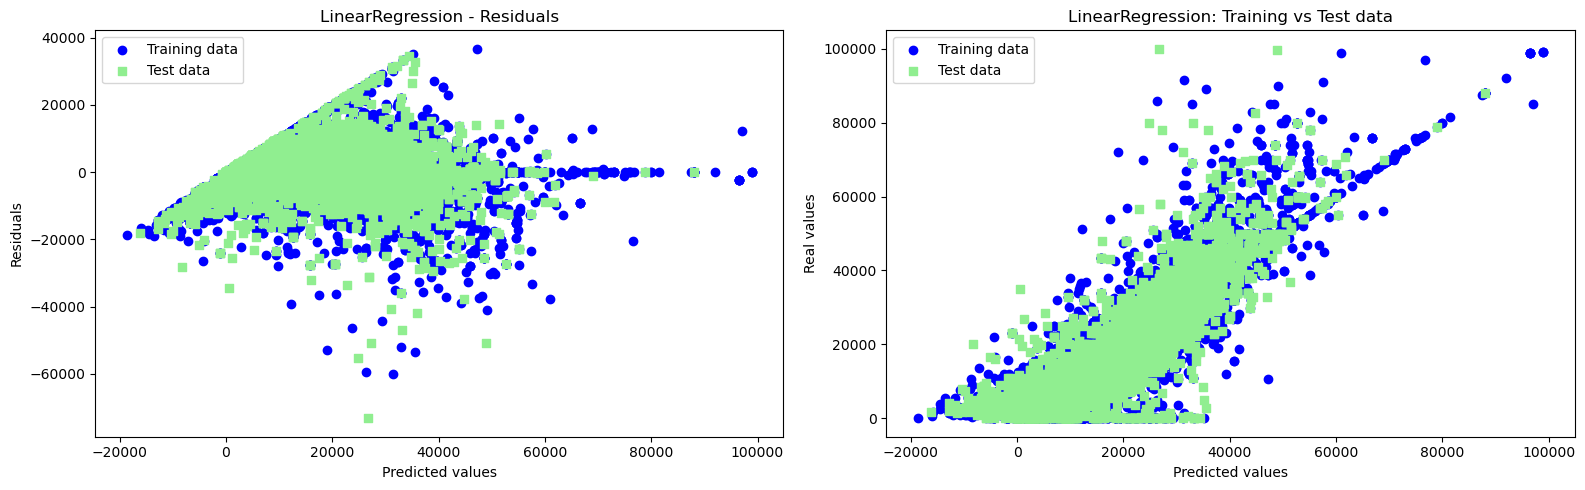

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'odometer']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['manufacturer', 'model',
                                                   'cylinders', 'fuel',
                                                   'title_status',
                                                   'transmission', 'drive',
                                                   'type', 'paint_color']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('ord_encoder',
                                                                   OrdinalEncoder(categories=[['new',
                                                                                               'like '
                                                                                               'new',
                                                                                               'excellent',
                                                                                               'good',
                                                                                               'fair',
                                                                                               'salvage']]))]),
                                                  ['condition'])])),
                ('regressor', LinearRegression())])

In [60]:
# ## 6. Modeling
# ### 6.1. Linear Regression
# #### 6.1.1. Linear Regression Pipeline
lr_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())])

# #### 6.1.2. Linear Regression Cross Validation
# lr_scores = cross_val_score(lr_pipe, X_train, y_train, cv=5, scoring='r2')
# lr_scores
lr_pipe.fit(X_train, y_train)
mse(X_train, X_test, y_train, y_test, lr_pipe, 'LinearRegression')
lr_pipe

Lasso Train MSE: 33586769.3658
Lasso Test MSE: 40211838.5677


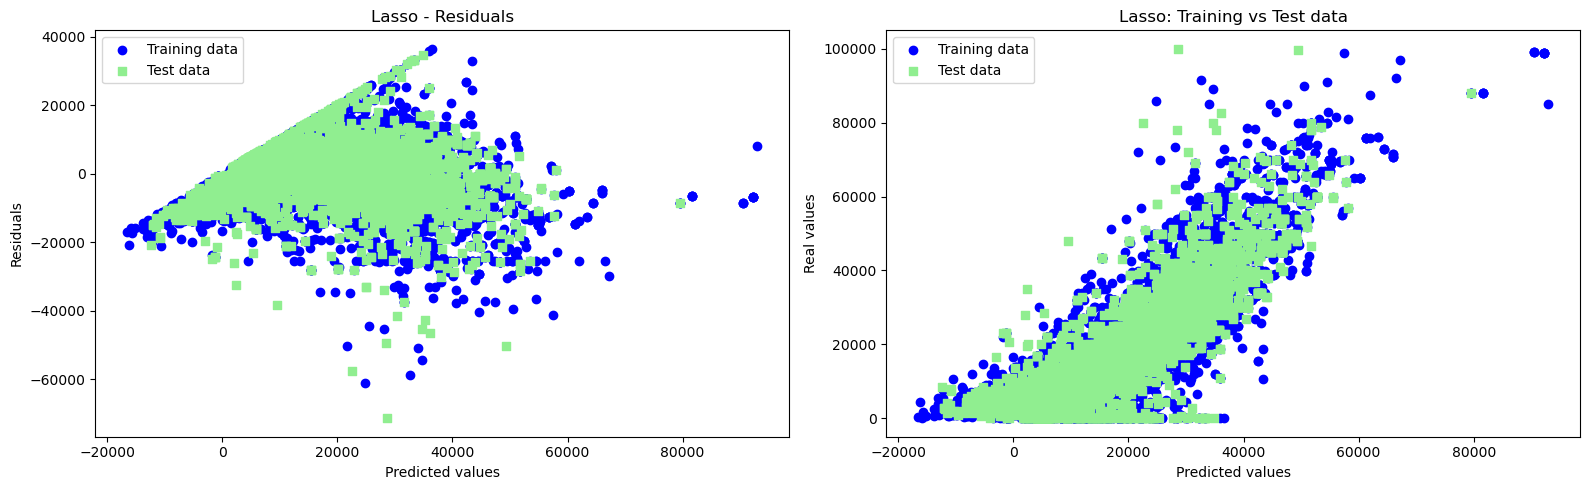

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'odometer']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['manufacturer', 'model',
                                                   'cylinders', 'fuel',
                                                   'title_status',
                                                   'transmission', 'drive',
                                                   'type', 'paint_color']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('ord_encoder',
                                                                   OrdinalEncoder(categories=[['new',
                                                                                               'like '
                                                                                               'new',
                                                                                               'excellent',
                                                                                               'good',
                                                                                               'fair',
                                                                                               'salvage']]))]),
                                                  ['condition'])])),
                ('regressor', Lasso())])

In [61]:

# ### 6.2. Lasso
# #### 6.2.1. Lasso Pipeline
lasso_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso())])

lasso_pipe.fit(X_train, y_train)
mse(X_train, X_test, y_train, y_test, lasso_pipe, 'Lasso')
lasso_pipe

Ridge Train MSE: 27122075.9375
Ridge Test MSE: 36525410.5737


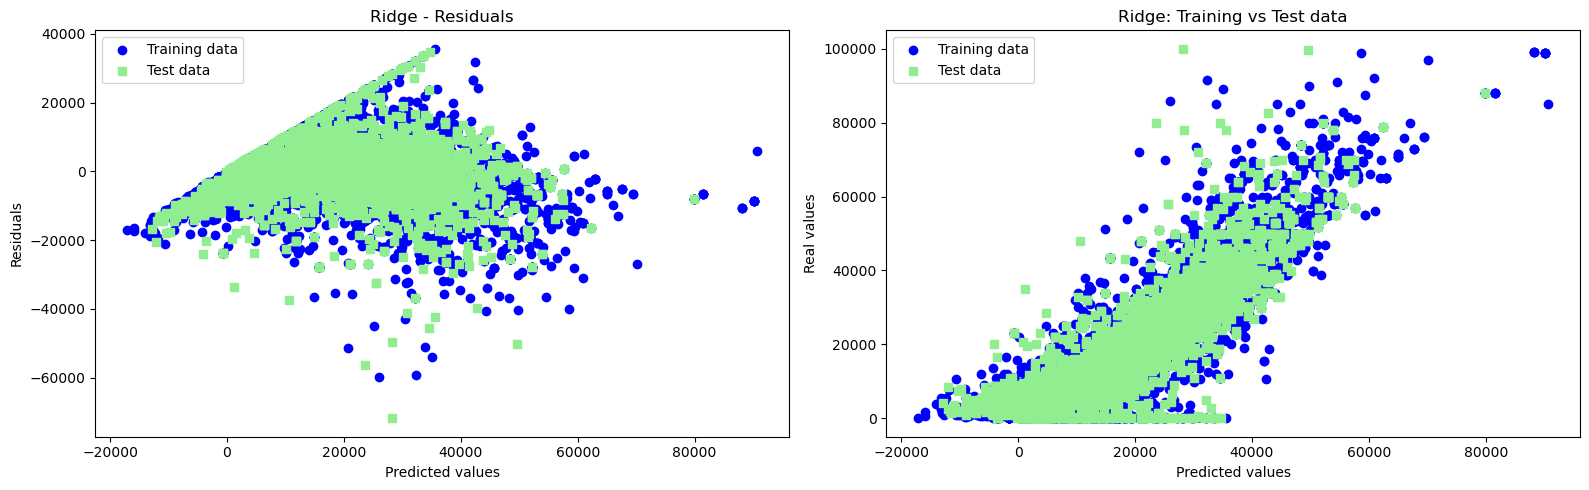

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'odometer']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['manufacturer', 'model',
                                                   'cylinders', 'fuel',
                                                   'title_status',
                                                   'transmission', 'drive',
                                                   'type', 'paint_color']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('ord_encoder',
                                                                   OrdinalEncoder(categories=[['new',
                                                                                               'like '
                                                                                               'new',
                                                                                               'excellent',
                                                                                               'good',
                                                                                               'fair',
                                                                                               'salvage']]))]),
                                                  ['condition'])])),
                ('regressor', Ridge())])

In [62]:
# ### 6.3. Ridge
# #### 6.3.1. Ridge Pipeline
ridge_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())])
ridge_pipe.fit(X_train, y_train)
mse(X_train, X_test, y_train, y_test, ridge_pipe, 'Ridge')
ridge_pipe

HuberRegressor Train MSE: 38558124.823
HuberRegressor Test MSE: 42187953.9767


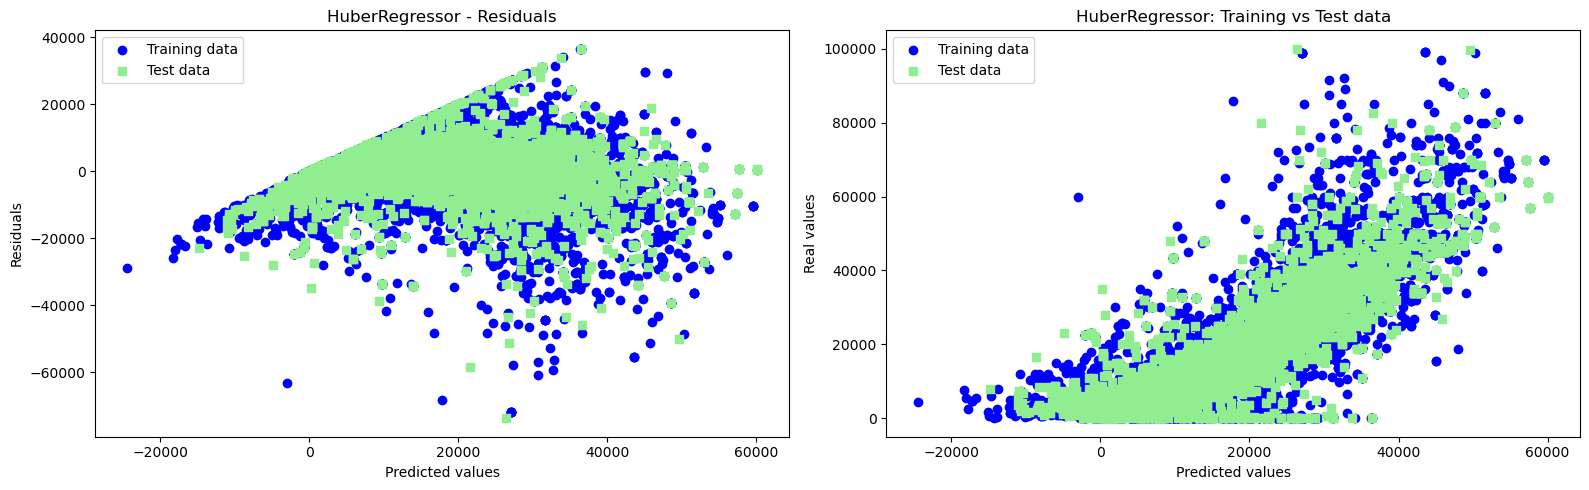

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'odometer']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['manufacturer', 'model',
                                                   'cylinders', 'fuel',
                                                   'title_status',
                                                   'transmission', 'drive',
                                                   'type', 'paint_color']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('ord_encoder',
                                                                   OrdinalEncoder(categories=[['new',
                                                                                               'like '
                                                                                               'new',
                                                                                               'excellent',
                                                                                               'good',
                                                                                               'fair',
                                                                                               'salvage']]))]),
                                                  ['condition'])])),
                ('regressor', HuberRegressor())])

In [63]:
# ### 6.4. HuberRegressor
# #### 6.4.1. HuberRegressor Pipeline
hr_pipe = Pipeline(steps=[  
    ('preprocessor', preprocessor),
    ('regressor', HuberRegressor())])

# #### 6.4.2. HuberRegressor Validation
hr_pipe.fit(X_train, y_train)
mse(X_train, X_test, y_train, y_test, hr_pipe, 'HuberRegressor')
hr_pipe

TransformedTargetRegressor Train MSE: 102665114.5667
TransformedTargetRegressor Test MSE: 296314699.733


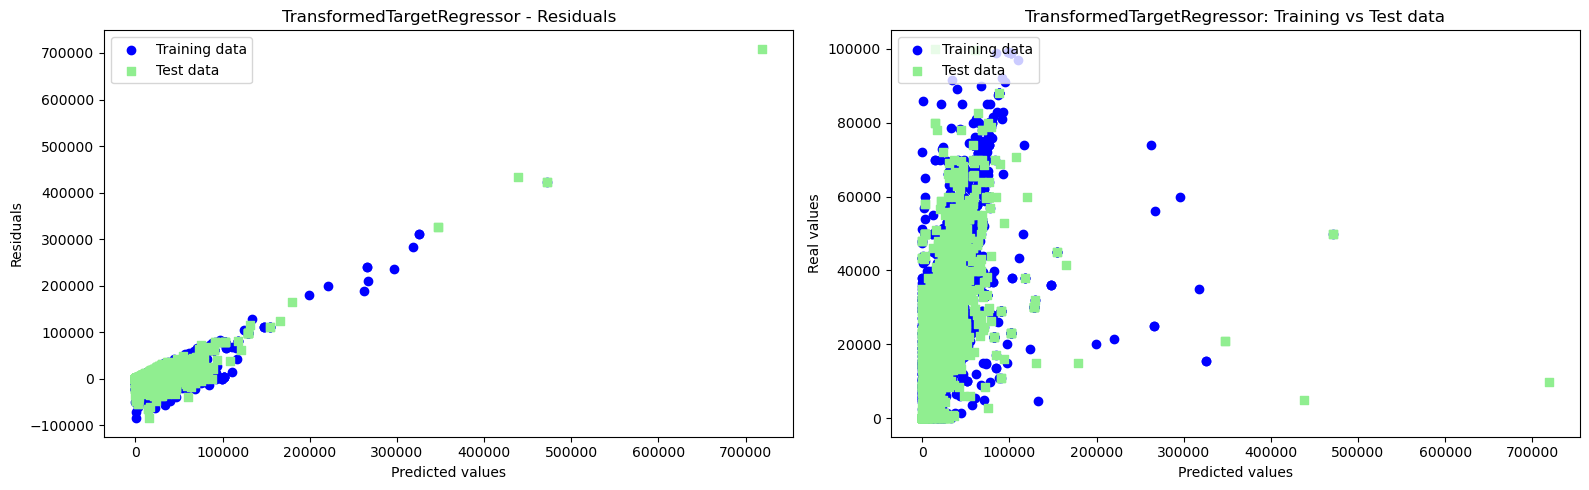

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'odometer']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['manufacturer', 'model',
                                                   'cylinders', 'fuel',
                                                   'title_status',
                                                   'transmission', 'drive',
                                                   'type', 'paint_color']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('ord_encoder',
                                                                   OrdinalEncoder(categories=[['new',
                                                                                               'like '
                                                                                               'new',
                                                                                               'excellent',
                                                                                               'good',
                                                                                               'fair',
                                                                                               'salvage']]))]),
                                                  ['condition'])])),
                ('regressor',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=LinearRegression()))])

In [64]:

# ### 6.5. TransformedTargetRegressor
# #### 6.5.1. TransformedTargetRegressor Pipeline
ttr_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', TransformedTargetRegressor(regressor = LinearRegression(), func = np.log1p, inverse_func=np.expm1))])

# #### 6.5.2. TransformedTargetRegressor Validation
ttr_pipe.fit(X_train, y_train)
mse(X_train, X_test, y_train, y_test, ttr_pipe, 'TransformedTargetRegressor')
ttr_pipe

In [65]:
def plot_mse_comparison(out_df_p, columns=['train_mse', 'test_mse'], save_image=False):
    # PLot bar chart of all columns in out_df
    sns.set_palette("Paired")
    out_df_p.plot.bar(x='model', y=columns, rot=0)
    plt.ylabel('error score')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    if save_image:
        plt.savefig('images/mse_comparison.png', format="png", bbox_inches='tight')
    plt.show()

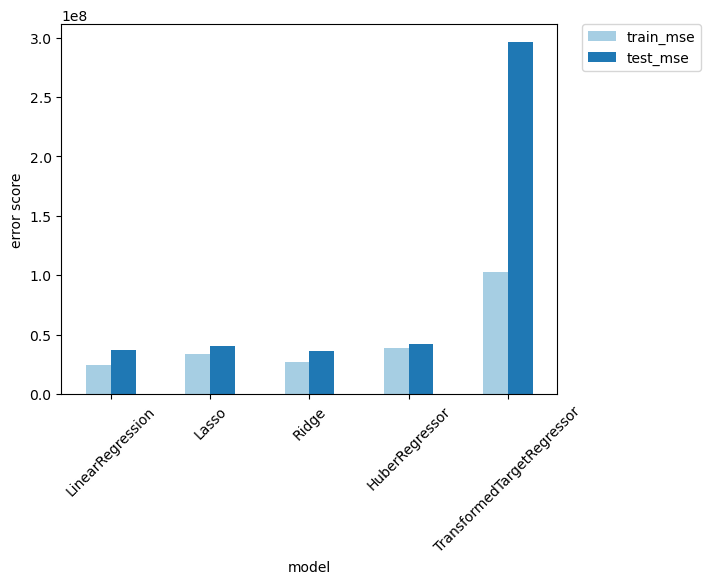

In [66]:
# # PLot bar chart of all columns in out_df
# sns.set_palette("Paired")
# # out_df_p = out_df[out_df['model'].isin(['LinearRegression', 'Ridge', 'Lasso'])]
# out_df_p = out_df
# out_df_p.plot.bar(x='model', y=['train_mae', 'test_mae', 'train_mse', 'test_mse', 'train_rmse', 'test_rmse'], rot=0)
# # move legend to top right
# # plt.legend(loc='upper right')
# # move legend to additonal space right
# # add y axis label
# plt.ylabel('error score')
# # x axis angle
# plt.xticks(rotation=45)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# plt.show()


plot_mse_comparison(out_df, ['train_mse', 'test_mse'], True)

In [67]:
# change model name to lasso for row index 1
# out_df.loc[1, 'model'] = 'Lasso'
out_df

,model,train_mae,test_mae,train_mse,test_mse,train_rmse,test_rmse
0,LinearRegression,3005.6590,3853.6401,2.475371e+07,3.738936e+07,4975.310527,6114.683964
1,Lasso,3961.4302,4206.3633,3.358677e+07,4.021184e+07,5795.409335,6341.280515
2,Ridge,3375.1764,3893.0054,2.712208e+07,3.652541e+07,5207.885937,6043.625615
3,HuberRegressor,3674.9115,3966.7387,3.855812e+07,4.218795e+07,6209.518888,6495.225475
4,TransformedTargetRegressor,4059.3783,5275.9561,1.026651e+08,2.963147e+08,10132.379512,17213.793880


LinearRegression_Grid Train MSE: 24753715.018
LinearRegression_Grid Test MSE: 37389158.1266


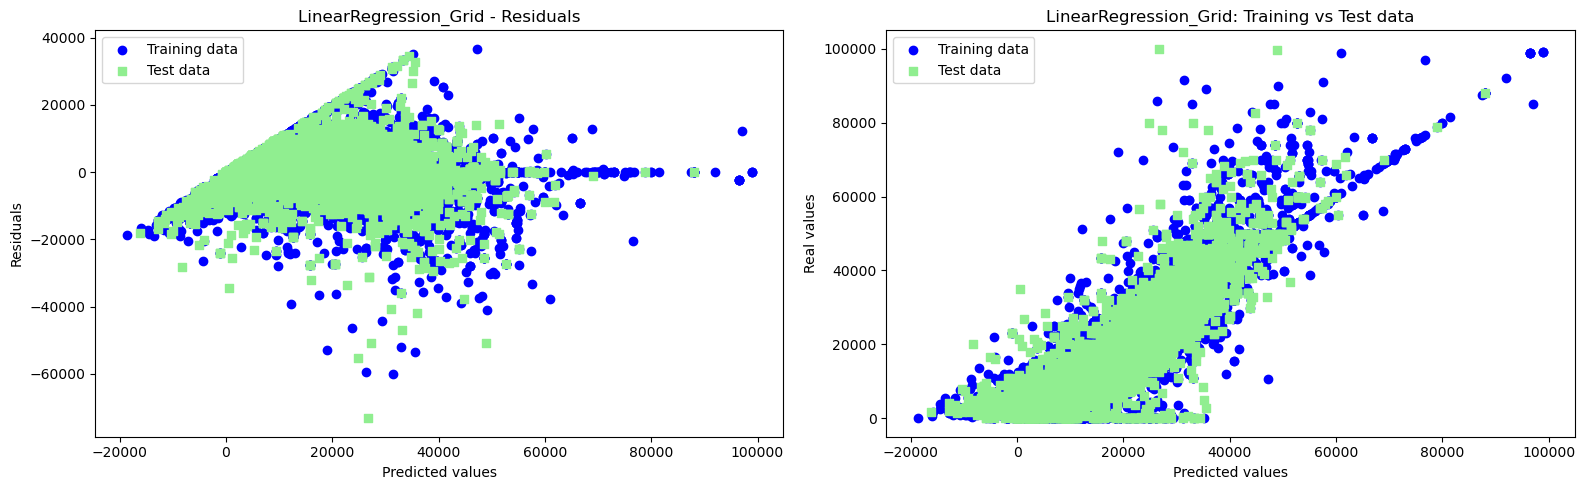

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'odometer']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['manufacturer', 'model',
                                                   'cylinders', 'fuel',
                                                   'title_status',
                                                   'transmission', 'drive',
                                                   'type', 'paint_color']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('ord_encoder',
                                                                   OrdinalEncoder(categories=[['new',
                                                                                               'like '
                                                                                               'new',
                                                                                               'excellent',
                                                                                               'good',
                                                                                               'fair',
                                                                                               'salvage']]))]),
                                                  ['condition'])])),
                ('regressor',
                 LinearRegression(fit_intercept=False, normalize=True))])

In [68]:
# 6.7 perform grid search on best model # LinearRegression


lr_params = {
    'regressor__fit_intercept': [True, False],
    'regressor__normalize': [True, False],
    'regressor__copy_X': [True, False]
}

lr_grid = GridSearchCV(lr_pipe, lr_params, cv=5, scoring='neg_mean_squared_error')
lr_grid.fit(X_train, y_train)
lr_grid.best_params_

mse(X_train, X_test, y_train, y_test, lr_grid.best_estimator_, 'LinearRegression_Grid')
lr_grid.best_estimator_

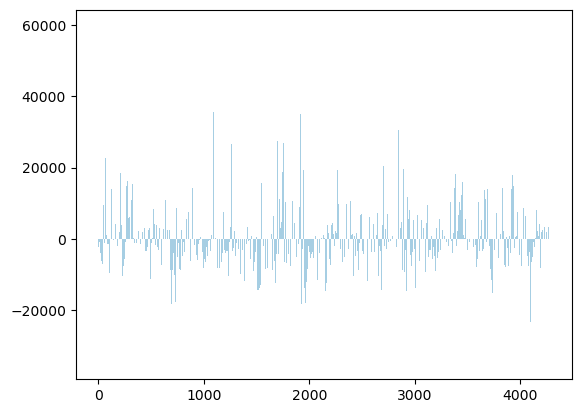

In [69]:
# permute feature importance
# https://scikit-learn.org/stable/modules/permutation_importance.html
# https://www.kaggle.com/dansbecker/permutation-importance
# https://www.kaggle.com/dansbecker/permutation-importance


# get importance
importance = lr_grid.best_estimator_['regressor'].coef_
plt.bar([x for x in range(len(importance))], importance)
plt.show()



In [70]:
out_df

,model,train_mae,test_mae,train_mse,test_mse,train_rmse,test_rmse
0,LinearRegression,3005.6590,3853.6401,2.475371e+07,3.738936e+07,4975.310527,6114.683964
1,Lasso,3961.4302,4206.3633,3.358677e+07,4.021184e+07,5795.409335,6341.280515
2,Ridge,3375.1764,3893.0054,2.712208e+07,3.652541e+07,5207.885937,6043.625615
3,HuberRegressor,3674.9115,3966.7387,3.855812e+07,4.218795e+07,6209.518888,6495.225475
4,TransformedTargetRegressor,4059.3783,5275.9561,1.026651e+08,2.963147e+08,10132.379512,17213.793880
5,LinearRegression_Grid,3005.6712,3853.6143,2.475372e+07,3.738916e+07,4975.310545,6114.667458


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

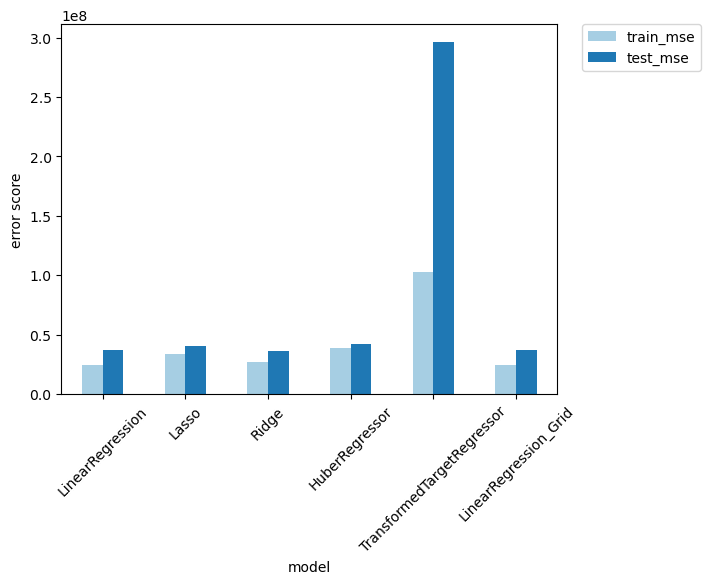

In [71]:
# plot mse comparison for all models
plot_mse_comparison(out_df)

#### Conclusion : Linear Regression is the best model which is giving the best mse score

To get the feature importance, I have used the following code:

In [ ]:
def cal_permutation_importance(model):
    perm_imp_df = pd.DataFrame(columns=['model', 'metric', 'feature', 'importance_mean', 'importance_std'])
    selected_features = X_test.columns.to_list()
    scoring = ['r2', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error']
    r_multi = permutation_importance(
        model, X_test[selected_features], y_test, n_repeats=30, random_state=0, scoring=scoring)
    for metric in r_multi:
        print(f"{metric}")
        r = r_multi[metric]
        for i in r.importances_mean.argsort()[::-1]:
            # if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
                print(f"    {list(X_test.columns)[i]:<8}"   
                    f"{r.importances_mean[i]:.3f}"
                    f" +/- {r.importances_std[i]:.3f}")
                perm_imp_df = perm_imp_df.append({'model': 'LinearRegression_Grid', 'metric': metric, 'feature': selected_features[i], 'importance_mean': r.importances_mean[i], 'importance_std': r.importances_std[i]}, ignore_index=True)
    
    # plot permutation importance using seaborn boxplot including std error
    for metric in perm_imp_df['metric'].unique():
        fig, ax = plt.subplots()
        sns.barplot(x='importance_mean', y='feature', data=perm_imp_df[perm_imp_df['metric'] == metric], ax=ax)
        # add 'importance_std' value on each bar
        for i, v in enumerate(perm_imp_df[perm_imp_df['metric'] == metric]['importance_std']):
            ax.text(v + 0.01, i + 0.25, '±'+str(round(v, 4)), color='blue', fontweight='bold')
        ax.set_xlabel("importance_mean")
        ax.set_title("Permutation Importances using metric = " + metric)
        fig.tight_layout()
        plt.show()



r2
    model   0.525 +/- 0.011
    age     0.322 +/- 0.006
    manufacturer0.302 +/- 0.007
    odometer0.130 +/- 0.002
    fuel    0.067 +/- 0.002
    transmission0.046 +/- 0.002
    type    0.041 +/- 0.002
    drive   0.014 +/- 0.001
    cylinders0.013 +/- 0.001
    title_status0.004 +/- 0.001
    paint_color0.002 +/- 0.000
    condition0.002 +/- 0.000
    size    0.000 +/- 0.000
    VIN     0.000 +/- 0.000
    state   0.000 +/- 0.000
    year    0.000 +/- 0.000
    region  0.000 +/- 0.000
    id      0.000 +/- 0.000
neg_mean_absolute_percentage_error
    transmission189.798 +/- 3.228
    model   129.181 +/- 12.111
    cylinders49.732 +/- 1.399
    type    31.758 +/- 2.423
    manufacturer21.010 +/- 9.427
    fuel    17.528 +/- 5.011
    paint_color3.599 +/- 0.903
    id      0.000 +/- 0.000
    region  0.000 +/- 0.000
    size    0.000 +/- 0.000
    VIN     0.000 +/- 0.000
    state   0.000 +/- 0.000
    year    0.000 +/- 0.000
    title_status-1.400 +/- 1.219
    condition-2.083 +/-

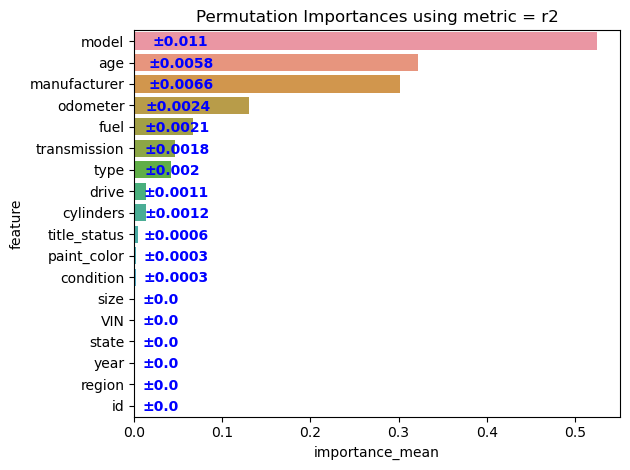

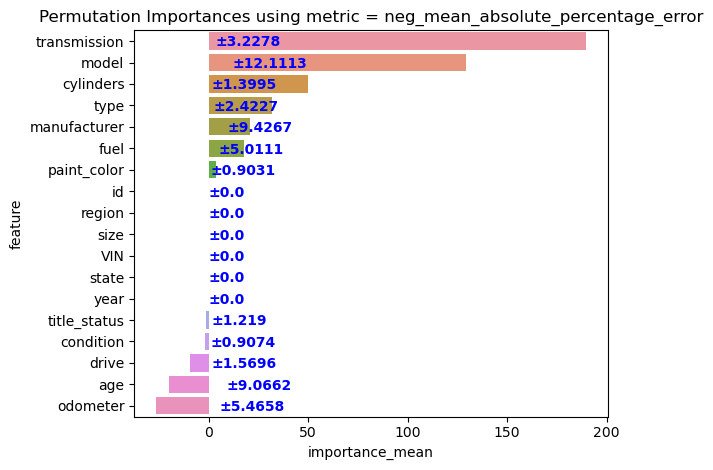

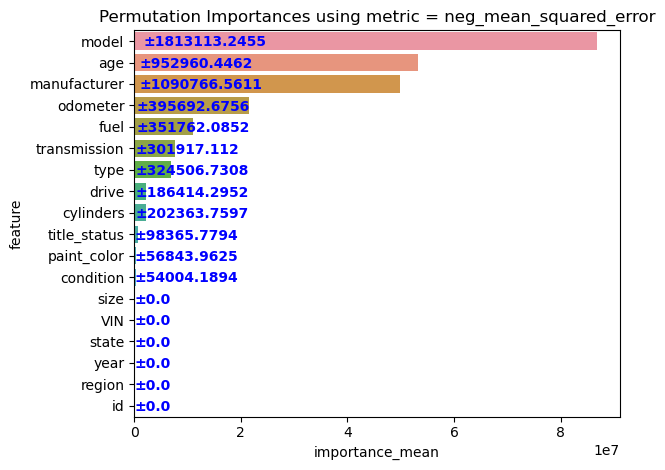

In [ ]:
cal_permutation_importance(lr_grid.best_estimator_)
# perm_imp_df

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

From Permutation Importance, we can see that the most important features are:
1. model
2. manufacturer
3. age
 these are the most important features that are driving the price of a car.
